# Background on Sample Data
In this lecture, we will be working with the data generated from CHBE473: Membrane Separation Unit.

The purpose of this lab is to vary parameters of the setup to see its impact on membrane separation. In this lab, we given an inlet flow of air and a certain pressure and flow rate to travel through two separate membranes. The membrane is oxygen selective, which means that mostly O2 will go through. Because we have two membranes, we can also choose the configuration/order we want the air to flow through

The goal of the experiment is to find the parameters that would give us the greatest separation of nitrogen and oxygen from air.

Because our goal is to learn the data analysis, we will not look too deeply into the results and focus on how we efficiently analysis the data without considering too much on the theory of membrane separation

Key Terms:

1) Permeate is the gas that cross the membrane (O2 mostly goes through the membrane)
2) Retentate is the gas that does not cross the membrane (N2 doesn't pass through)
3) There are two configurations (Series and Parallel)
    * Series mean all gas will go through both membranes
    * Parallel means half the gas will go through each membrane

Experimental Setup:
1) Air is fed to the unit operation and we expect a oxygen rich and nitrogen rich stream
2) For each run, we have a set pressure and configuration
    * Each data file will include data for that pressure and configuration at varying air flow rates
3) We will measure performance of the membrane separation by nitrogen purity, separation factor, and the cut
    * Nitrogen Purity: Mole fraction of nitrogen in the retentate
    $$Nitrogen Purity = \frac{n_{N_2}}{n_{total}}$$

    * Separation Factor: 
    $$Separation Factor = \frac{\frac{y_{O_2}}{x_{O_2}}}{\frac{y_{N_2}}{x_{N_2}}}$$
            y = mole fraction in the permeate stream
            x = mole fraction in the retentate stream
    
    * The Cut: Permeate / Feed Flow Rate
    $$Cut = \frac{n_{permeate}}{n_{feed}}$$

Below we have the schematic of the two configuration

<img src="../jupyter-notebook-images/membrane-separation-setup.jpg" width="750"/>

# Main Goals and Learning Outcomes
## Checklist:

    1) Import data from multiple excel files using glob
    2) Labeling data based on file
    3) Data analysis based on chemical engineering
    2) Create a self-defined plot function for easy plotting

## Import Module

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob

## Import Data
All data is provided in the `Sample-Data/Membrane-Separation-Example` folder

In [38]:
files = glob.glob("../Sample-Data/Membrane-Separation-Example/*.xlsx")
    
files

['../Sample-Data/Membrane-Separation-Example\\100 psig parallel.xlsx',
 '../Sample-Data/Membrane-Separation-Example\\100 psig series.xlsx',
 '../Sample-Data/Membrane-Separation-Example\\120 psig parallel.xlsx',
 '../Sample-Data/Membrane-Separation-Example\\120 psig series.xlsx',
 '../Sample-Data/Membrane-Separation-Example\\20 psig parallel.xlsx',
 '../Sample-Data/Membrane-Separation-Example\\20 psig series.xlsx',
 '../Sample-Data/Membrane-Separation-Example\\40 psig parallel.xlsx',
 '../Sample-Data/Membrane-Separation-Example\\40 psig series.xlsx',
 '../Sample-Data/Membrane-Separation-Example\\60 psig parallel.xlsx',
 '../Sample-Data/Membrane-Separation-Example\\60 psig series.xlsx',
 '../Sample-Data/Membrane-Separation-Example\\80 psig parallel.xlsx',
 '../Sample-Data/Membrane-Separation-Example\\80 psig series.xlsx']

Extract filename from path

In [39]:
sample_file_name = files[0].split("\\")[-1]
sample_file_name

'100 psig parallel.xlsx'

Extracting the pressure

In [40]:
sample_file_name.split()[0]

'100'

Extracting the coniguration

In [41]:
sample_file_name.split()[-1][:-5]

'parallel'

## Creating DataFrame for all data and labeling based on path name

In [42]:
all_data = pd.DataFrame()

for file_path in files:
    
    data = pd.read_excel(file_path)
    
    # Extra file path name
    file_name = file_path.split("\\")[-1]
    pressure = file_name.split()[0]
    config = file_name.split()[-1][:-5]
    
    data["Pressure"] = pressure
    data["Config"] = config

    all_data = pd.concat([all_data, data], ignore_index=True, axis=0)

all_data

,Iteration,Operating Pressure,Bottom Oxygen Analyzer,Top Oxygen Analyzer,Bottom Flow Meter,Top Flow Meter,Pressure,Config
0,0,101.559,4.039,22.581,1.318,51.385,100,parallel
1,1,100.222,4.183,22.284,1.468,51.382,100,parallel
2,2,100.223,4.019,22.423,1.366,51.491,100,parallel
3,3,100.184,3.898,22.311,1.491,51.447,100,parallel
4,4,100.216,3.872,22.470,1.386,51.471,100,parallel
...,...,...,...,...,...,...,...,...
667,51,80.033,4.344,30.750,19.492,43.369,80,series
668,52,80.043,4.307,30.716,19.625,43.394,80,series
669,53,80.032,4.365,30.799,19.467,43.267,80,series
670,54,80.035,4.297,30.761,19.472,43.255,80,series


## Labeling the run number and tagging the first two data points as unsteady state

In [43]:
all_data["Run_State"] = np.where((all_data["Iteration"] % 7 == 0) | (all_data["Iteration"] % 7 == 1),"Unsteady","Steady")
all_data["Run_#"] = (all_data["Iteration"] - (all_data["Iteration"] % 7)) / 7

data_types_dict = {"Run_#" : int,
                   "Pressure": int}
all_data = all_data.astype(data_types_dict)

all_data.head(11)

,Iteration,Operating Pressure,Bottom Oxygen Analyzer,Top Oxygen Analyzer,Bottom Flow Meter,Top Flow Meter,Pressure,Config,Run_State,Run_#
0,0,101.559,4.039,22.581,1.318,51.385,100,parallel,Unsteady,0
1,1,100.222,4.183,22.284,1.468,51.382,100,parallel,Unsteady,0
2,2,100.223,4.019,22.423,1.366,51.491,100,parallel,Steady,0
3,3,100.184,3.898,22.311,1.491,51.447,100,parallel,Steady,0
4,4,100.216,3.872,22.470,1.386,51.471,100,parallel,Steady,0
5,5,100.227,3.809,22.288,1.405,51.450,100,parallel,Steady,0
6,6,100.204,3.944,22.463,1.430,51.465,100,parallel,Steady,0
7,7,100.079,3.945,22.364,2.102,51.686,100,parallel,Unsteady,1
8,8,100.225,4.026,22.645,2.041,51.682,100,parallel,Unsteady,1
9,9,100.215,3.929,22.709,2.059,51.682,100,parallel,Steady,1


## Removing the unsteady state rows out and taking the average of the steady state values

In [44]:
all_data_steady_state = all_data[all_data["Run_State"] == "Steady"]

all_data_steady_state_avg = all_data_steady_state.groupby(["Config", "Pressure","Run_#"]).mean()

all_data_steady_state_avg

Iteration  Operating Pressure  \
Config   Pressure Run_#                                  
parallel 20       0              4             19.5836   
                  1             11             19.6786   
                  2             18             19.6762   
                  3             25             19.6892   
                  4             32             19.6758   
...                            ...                 ...   
series   120      3             25            120.2276   
                  4             32            120.2498   
                  5             39            120.2252   
                  6             46            120.1298   
                  7             53            120.2752   

                         Bottom Oxygen Analyzer  Top Oxygen Analyzer  \
Config   Pressure Run_#                                                
parallel 20       0                     12.4310              23.9076   
                  1                     12.9888              24.7144   
                  2                     14.0532              26.2946   
                  3                     15.3750              28.1162   
                  4                     15.9238              28.7808   
...                                         ...                  ...   
series   120      3                      1.5740              25.7854   
                  4                      1.6898              26.2788   
                  5                      1.8140              26.7638   
                  6                      2.0700              27.7040   
                  7                      2.2914              28.4696   

                         Bottom Flow Meter  Top Flow Meter  
Config   Pressure Run_#                                     
parallel 20       0                 1.3264          4.6034  
                  1                 2.0962          4.7204  
                  2                 4.0782          4.9090  
                  3                 7.8512          5.1526  
                  4                 9.9472          5.2620  
...                                    ...             ...  
series   120      3                 8.0310         63.5388  
                  4                 9.8160         64.0458  
                  5                11.8972         64.6422  
                  6                15.7866         65.6954  
                  7                19.6046         66.6636  

[96 rows x 6 columns]

## Basic Plotting (just to check data is organized correctly)

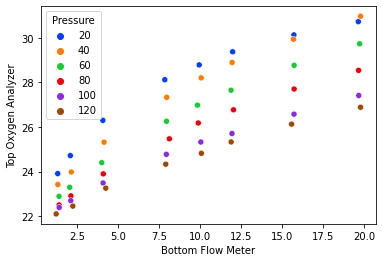

In [45]:
g = sns.scatterplot(data=all_data_steady_state_avg.loc["parallel"], x="Bottom Flow Meter", y="Top Oxygen Analyzer", hue="Pressure", palette="bright")

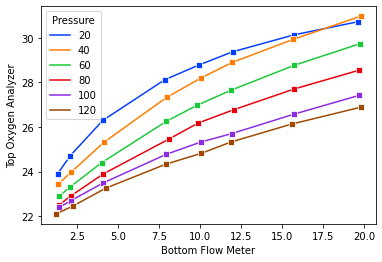

In [46]:
g = sns.lineplot(data=all_data_steady_state_avg.loc["parallel"], x="Bottom Flow Meter", y="Top Oxygen Analyzer", hue="Pressure", marker="s",linestyle="-", palette="bright")

## Data Aggregation

### A) Calculate Nitrogen Purity
$$Purity = \frac{n_{N_2}}{n_{total}}$$

In [47]:
all_data_steady_state_avg["Nitrogen Purity"] = 1 - all_data_steady_state_avg["Bottom Oxygen Analyzer"] / 100

### B) Calculate The Cut
$$Cut = \frac{n_{permeate}}{n_{feed}}$$

In [48]:
all_data_steady_state_avg["Cut"] = all_data_steady_state_avg["Top Flow Meter"] / (all_data_steady_state_avg["Top Flow Meter"] + all_data_steady_state_avg["Bottom Flow Meter"])

### C) Calculate Separation Factor
$$Separation Factor = \frac{\frac{y_{O_2}}{x_{O_2}}}{\frac{y_{N_2}}{x_{N_2}}}$$
            y = mole fraction in the permeate stream
            x = mole fraction in the retentate stream

In [49]:
all_data_steady_state_avg["Top Nitrogen"] = 100 - all_data_steady_state_avg["Top Oxygen Analyzer"]
all_data_steady_state_avg["Bottom Nitrogen"] = 100 - all_data_steady_state_avg["Bottom Oxygen Analyzer"]

all_data_steady_state_avg["Separation Factor"] = (all_data_steady_state_avg["Top Oxygen Analyzer"] / all_data_steady_state_avg["Bottom Oxygen Analyzer"]) / (all_data_steady_state_avg["Top Nitrogen"] / all_data_steady_state_avg["Bottom Nitrogen"])

## Separate data based on configuration

In [50]:
parallel_data = all_data_steady_state_avg.loc["parallel"]
series_data = all_data_steady_state_avg.loc["series"]

In [51]:
parallel_data.head()

Iteration  Operating Pressure  Bottom Oxygen Analyzer  \
Pressure Run_#                                                          
20       0              4             19.5836                 12.4310   
         1             11             19.6786                 12.9888   
         2             18             19.6762                 14.0532   
         3             25             19.6892                 15.3750   
         4             32             19.6758                 15.9238   

                Top Oxygen Analyzer  Bottom Flow Meter  Top Flow Meter  \
Pressure Run_#                                                           
20       0                  23.9076             1.3264          4.6034   
         1                  24.7144             2.0962          4.7204   
         2                  26.2946             4.0782          4.9090   
         3                  28.1162             7.8512          5.1526   
         4                  28.7808             9.9472          5.2620   

                Nitrogen Purity       Cut  Top Nitrogen  Bottom Nitrogen  \
Pressure Run_#                                                             
20       0             0.875690  0.776316       76.0924          87.5690   
         1             0.870112  0.692486       75.2856          87.0112   
         2             0.859468  0.546221       73.7054          85.9468   
         3             0.846250  0.396238       71.8838          84.6250   
         4             0.840762  0.345975       71.2192          84.0762   

                Separation Factor  
Pressure Run_#                     
20       0               2.213294  
         1               2.199096  
         2               2.181834  
         3               2.152827  
         4               2.133694

In [52]:
series_data.head()

Iteration  Operating Pressure  Bottom Oxygen Analyzer  \
Pressure Run_#                                                          
20       0              4             19.6804                  9.6022   
         1             11             19.6772                 10.6286   
         2             18             19.5834                 12.0820   
         3             25             19.5880                 14.0378   
         4             32             19.5868                 14.6404   

                Top Oxygen Analyzer  Bottom Flow Meter  Top Flow Meter  \
Pressure Run_#                                                           
20       0                  25.4720             1.2710          4.6192   
         1                  26.6220             2.1462          4.6762   
         2                  28.1122             3.9744          4.8854   
         3                  29.9994             7.8864          4.9248   
         4                  30.5778             9.8768          5.0782   

                Nitrogen Purity       Cut  Top Nitrogen  Bottom Nitrogen  \
Pressure Run_#                                                             
20       0             0.903978  0.784218       74.5280          90.3978   
         1             0.893714  0.685419       73.3780          89.3714   
         2             0.879180  0.551412       71.8878          87.9180   
         3             0.859622  0.384414       70.0006          85.9622   
         4             0.853596  0.339565       69.4222          85.3596   

                Separation Factor  
Pressure Run_#                     
20       0               3.217590  
         1               3.050685  
         2               2.845631  
         3               2.624335  
         4               2.568073

## Advanced Plotting (Making all plots for presentation/report)

Specify which columns we want to plot and the label we would like to use for the y axis label

In [53]:
data_columns = ['Cut', 'Separation Factor', 'Nitrogen Purity']
y_labels = ['Cut (Permeate mole/ Total mol)', 'Separation Factor', 'Mole Fraction of Nitrogen']

label_dict = dict(zip(data_columns, y_labels))

data.columns

Index(['Iteration', 'Operating Pressure', 'Bottom Oxygen Analyzer',
       'Top Oxygen Analyzer', 'Bottom Flow Meter', 'Top Flow Meter',
       'Pressure', 'Config'],
      dtype='object')

In [54]:
def plot(data,df_x, df_y, title, xlabel, ylabel, config):
    fig = plt.figure(figsize=(6,6),dpi=100)
    ax = fig.add_subplot(1, 1, 1)

    g = sns.lineplot(data=data, x=df_x, y=df_y, marker="s",linestyle="-", hue="Pressure", palette="bright" )

    handles, labels = ax.get_legend_handles_labels()
    plt.legend(reversed(handles), reversed(labels), title='Pressure (psig)',loc='upper center', bbox_to_anchor=(1.15, 1.0),
            ncol=1, fancybox=True, shadow=True)
    
    # Label individually
    plt.title(title + config, fontweight='bold', fontsize=16)
    plt.ylabel(label_dict[ylabel], fontsize=15,labelpad = 12, fontweight='bold')
    plt.xlabel(xlabel, fontsize=15, labelpad = 12, fontweight='bold')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    
    # Since we are plotting on different figures, we want the same y-axis for easy comparison
    if ylabel == 'Nitrogen Purity':
        plt.ylim([0.82,1.01])
    elif ylabel == 'Separation Factor':
        plt.ylim([0,30])

## Plot Series Data

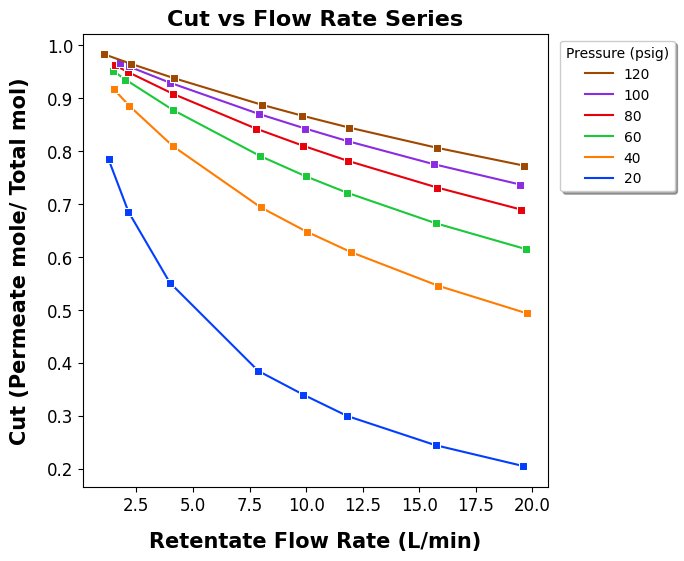

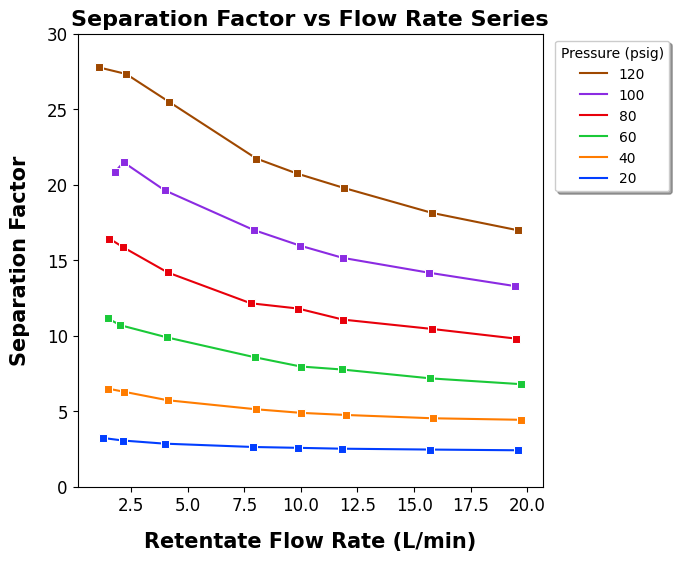

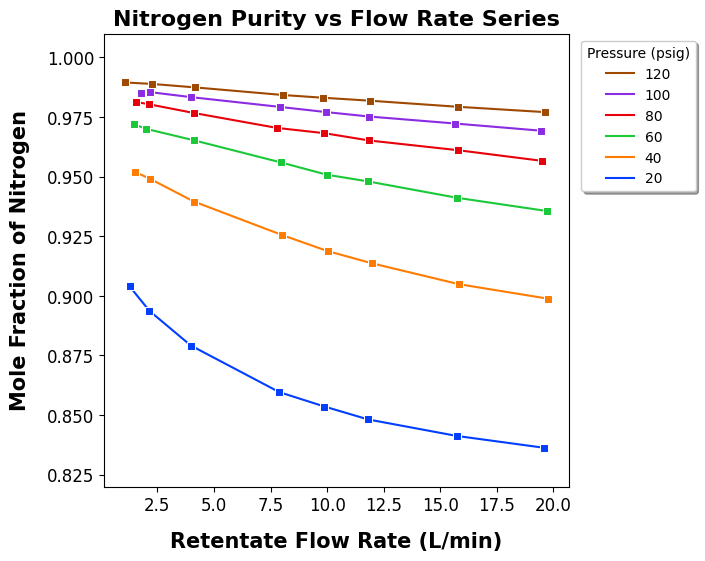

In [55]:
for variable in data_columns:
    plot(data=series_data, df_x="Bottom Flow Meter", df_y=variable, xlabel="Retentate Flow Rate (L/min)", ylabel=variable, title=f"{variable} vs Flow Rate", config=" Series")

## Plot parallel data

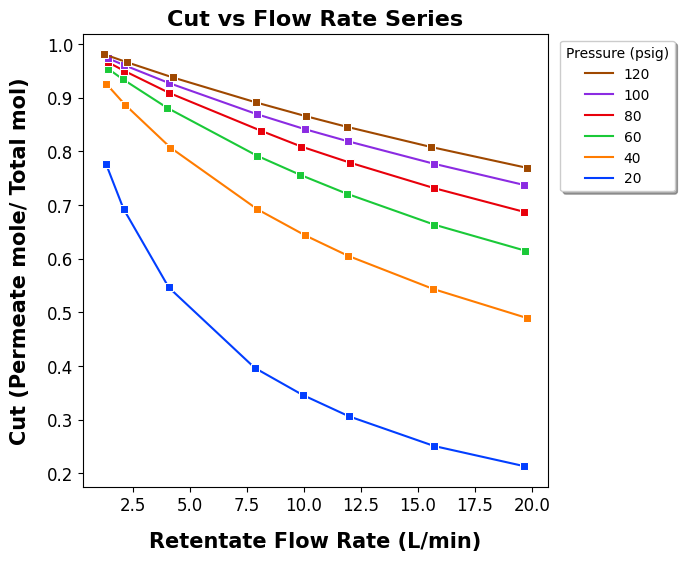

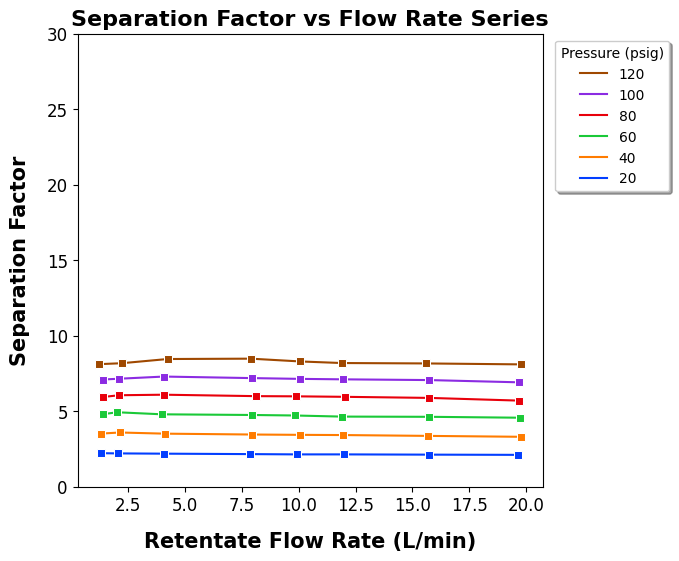

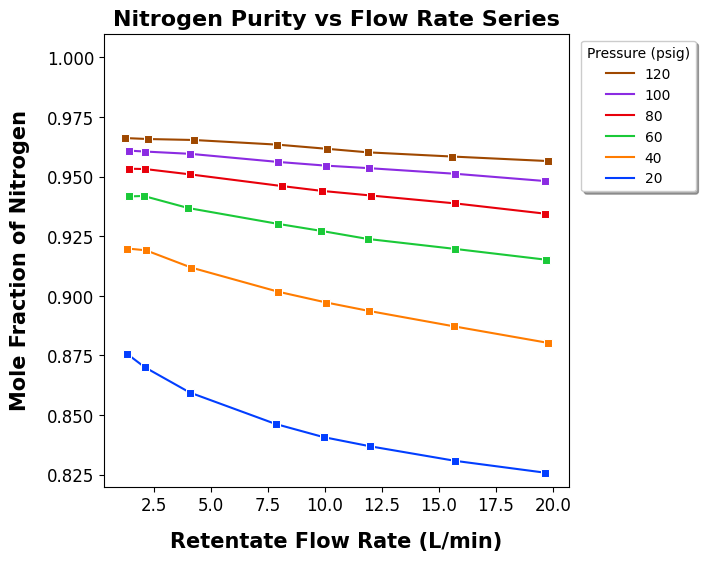

In [56]:
for variable in data_columns:
    plot(data=parallel_data, df_x="Bottom Flow Meter", df_y=variable, xlabel="Retentate Flow Rate (L/min)", ylabel=variable, title=f"{variable} vs Flow Rate", config=" Series")

# Plot Parallel and Series next to each other
Instead of splitting the parallel and series data into different DataFrame, we can keep it all in one DataFrame and plot side by side for easier comparison

In [57]:
def plot(data, df_x, df_y, title, xlabel, ylabel):
    fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True)
    fig.set_size_inches(18,8)
    
    # Separate into parallel and series data sets
    parallel_data = all_data_steady_state_avg.loc["parallel"]
    series_data = all_data_steady_state_avg.loc["series"]
    
    # Plot a plot for parallel and series each, on different subplots
    g = sns.lineplot(data=parallel_data, x=df_x, y=df_y, marker="s",linestyle="-", hue="Pressure", palette="bright", ax=ax[0], legend=False).set_title(title + "\n" + "(Parallel)", fontweight='bold', fontsize=18)
    f = sns.lineplot(data=series_data, x=df_x, y=df_y, marker="s",linestyle="-", hue="Pressure", palette="bright", ax=ax[1]).set_title(title + "\n" + "(Series)", fontweight='bold', fontsize=18)
        
    # Label ylabel
    for axis in ax: 
        axis.set_ylabel(label_dict[ylabel], fontsize=16,labelpad = 12, fontweight='bold')
        axis.set_xlabel(xlabel, fontsize=16, labelpad = 12, fontweight='bold')
    
    # Move legend
    handles, labels = ax[1].get_legend_handles_labels()
    plt.legend(reversed(handles), reversed(labels), title='Pressure (psig)',loc='upper center', bbox_to_anchor=(1.1, 1.0),
            ncol=1, fancybox=True, shadow=True)


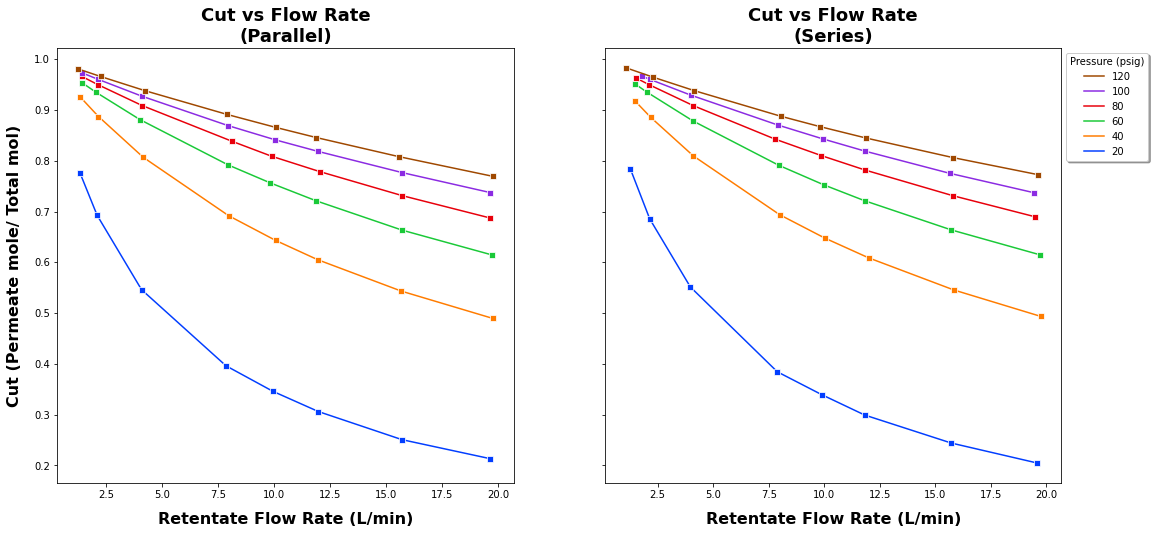

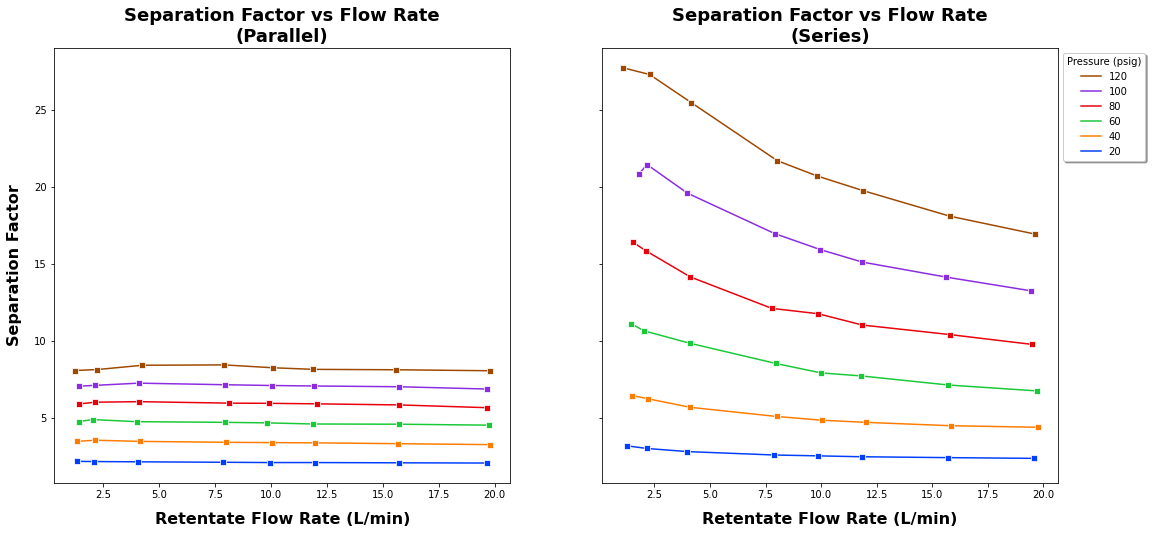

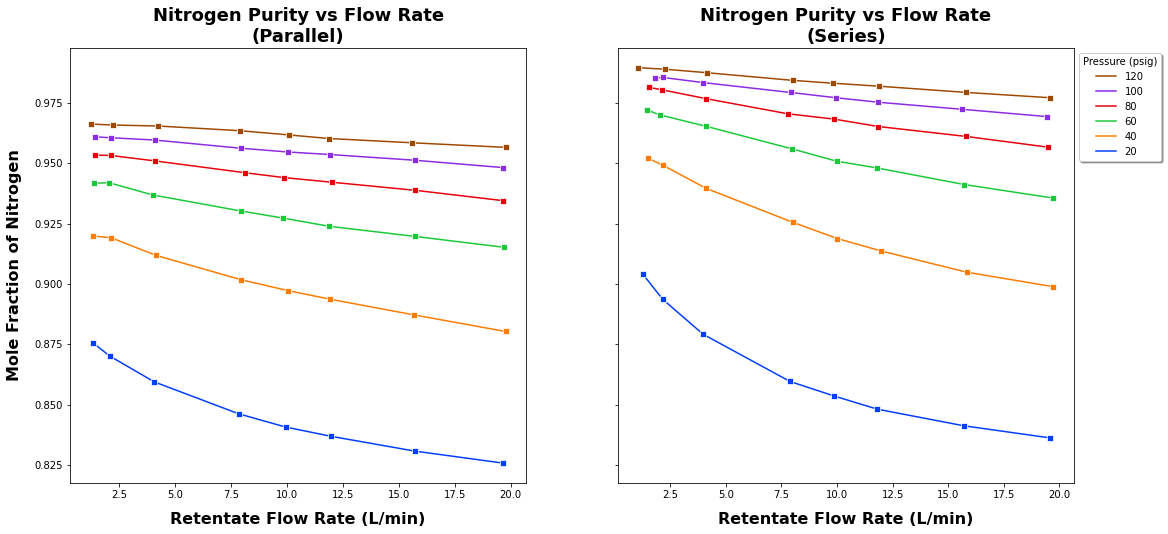

In [58]:
for variable in data_columns:
    plot(data=all_data_steady_state_avg, df_x="Bottom Flow Meter", df_y=variable, xlabel="Retentate Flow Rate (L/min)", ylabel=variable, title=f"{variable} vs Flow Rate")